In [ ]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape data.
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')
X_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
X_test  /= 255
print("Training X matrix shape", X_train.shape)
print("Testing X matrix shape", X_test.shape)

Training X matrix shape (60000, 784)
Testing X matrix shape (10000, 784)


In [ ]:


class MultiClassLogisticRegression:
    
    def __init__(self, n_iter, lr, i_Acc):
        self.n_iter = n_iter     #Vong lap
        self.isBreak =  0.0001     #do chenh lenh dung
        self.lr =  lr  #Learning rate
        self.i_Acc = i_Acc

    def fit(self, X, y, X_val, y_val): 
        self.classes = np.unique(y)   #lay ra all cac du lieu khac nhau cua y giong nhu set
        self.class_labels = {c:i for i,c in enumerate(self.classes)}   #dan nhan cho tuong class
        X, y = self.ADCT(X, y)  #CT trong giao trinh
        X_val, y_val = self.ADCT(X_val, y_val)
        self.loss_train = []
        self.error_train = []
        self.loss_test = [] 
        self.error_test = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))  #(10x784) 
        self.gradient_descent(X, y,  X_val, y_val)
        return self
    
    def ADCT(self, x, y):
        x = self.add_bias(x)  #CT trong giao trinh
        y = self.one_hot(y)   #CT trong giao trinh
        return x, y
 
    def gradient_descent(self, X, y, X_val, y_val):
          start = perf_counter()
          j = 0
          for i in range(self.n_iter):
            
            self.multinomial_logreg_error(X, y, X_val, y_val)
            update = self.multinomial_logreg_grad_i(X, y)
            self.weights += update
            if np.abs(update).max() < self.isBreak: 
                break
            if i % self.i_Acc == 0: 
                
                message = 'Loop {},  Loss_train {},  Acc_train {}, Loss_test {}, Acc_test {}'.format(i+1,self.loss_train[i], self.error_train[i], self.loss_test[i], self.error_test[i])
                j += 1
                print(message)
          end = perf_counter()
          time = int(end) - int(start)
          print('Chuong trinh chay mat: {} s'.format(time))
     
    def multinomial_logreg_error(self, X, y, X_val, y_val):
          self.loss_train.append(self.multinomial_logreg_loss_i(y, self.predict(X)))
          self.error_train.append(self.evaluate(X, y))
          self.loss_test.append(self.multinomial_logreg_loss_i(y_val, self.predict(X_val)))
          self.error_test.append(self.evaluate(X_val, y_val))
    
    def predict(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def CheckModel(self, X, number):
        print('Dự đoán cua X_test[{}] la: {}'.format(number, self.predict_class(X)[number]))
        
        plt.imshow(X_test[number].reshape(28,28), cmap='gray')
        plt.show()

    def predict_class(self, X):
        X_add = self.predict(self.add_bias(X))   #Xac suat
        return np.argmax(X_add, axis=1)

    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def one_hot(self, y):
        return np.eye(len(self.classes))[(y).reshape(-1)]
    
    def evaluate(self, X, y):
        return np.mean(np.argmax(self.predict(X), axis=1) == np.argmax(y, axis=1))
    
    #cross_entropy
    def multinomial_logreg_loss_i(self, y, probs):
        return -(np.mean(y * np.log(probs)))

    def score(self, X, y):
        return np.mean(self.predict_class(X) == y)

    def multinomial_logreg_grad_i(self, X, y):
        error = y - self.predict(X)
        return (self.lr * np.dot(error.T, X))
    

In [ ]:
lr = MultiClassLogisticRegression(n_iter = 100, lr=0.0001, i_Acc=10)
lr.fit(X_train,y_train, X_test, y_test)

Loop 1,  Loss_train 0.23025850929940433,  Acc_train 0.09871666666666666, Loss_test 0.23025850929940458, Acc_test 0.098
Loop 11,  Loss_train 1.281914552360371,  Acc_train 0.5907833333333333, Loss_test 1.2912437884454708, Acc_test 0.5949
Loop 21,  Loss_train 0.12300690810723558,  Acc_train 0.84075, Loss_test 0.11977116495159516, Acc_test 0.8485
Loop 31,  Loss_train 0.2623297609351941,  Acc_train 0.7585333333333333, Loss_test 0.26729155005874994, Acc_test 0.7603
Loop 41,  Loss_train 0.1101120522505649,  Acc_train 0.8573833333333334, Loss_test 0.10862054670625527, Acc_test 0.8623
Loop 51,  Loss_train 0.06819336396282327,  Acc_train 0.8959666666666667, Loss_test 0.06607181284341875, Acc_test 0.9046
Loop 61,  Loss_train 0.058567132618058966,  Acc_train 0.9012833333333333, Loss_test 0.05773670735085378, Acc_test 0.9063
Loop 71,  Loss_train 0.18623024112367126,  Acc_train 0.7746333333333333, Loss_test 0.18767637583692484, Acc_test 0.7776
Loop 81,  Loss_train 0.22712706800080137,  Acc_train 0.8

Dự đoán cua X_test[99] la: 9


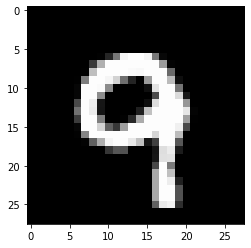

In [ ]:
lr.CheckModel(X_test, 99)

In [ ]:
lr.score(X_test, y_test)

0.9115

In [ ]:
def plot(loss_list):
    """store the plots"""
    # epoch_list = list(range(len(loss_list)))
    plt.plot(loss_list)
    plt.ylabel('Loss Function')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Loss Function ~ Epoch')
    plt.show()

    # plt.plot(accu_list)
    # plt.ylabel('Test Accuracy')
    # plt.xlabel('Epoch')
    # plt.xticks(rotation=60)
    # plt.title('Test Accuracy ~ Epoch')
    # plt.show()

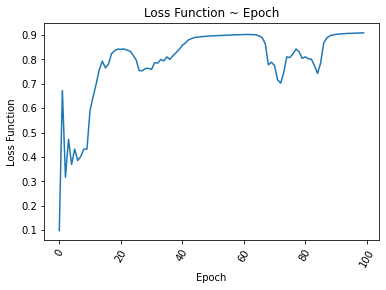

In [ ]:
plot(lr.error_train)

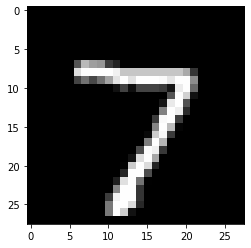

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [ ]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

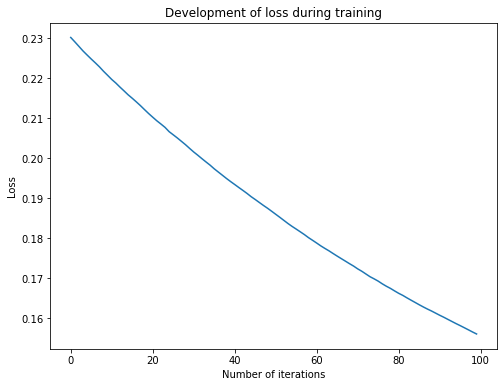

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
def initialize(num_inputs,num_classes):
    """initialize the parameters"""
    # num_inputs = 28*28 = 784
    # num_classes = 10
    w = np.random.randn(num_classes, num_inputs) / np.sqrt(num_classes*num_inputs) # (10*784)
    b = np.random.randn(num_classes, 1) / np.sqrt(num_classes) # (10*1) 
    
    param = {
        'w' : w, # (10*784)
        'b' : b  # (10*1)
    }
    return param

def softmax(z):
    """implement the softmax functions
    input: numpy ndarray
    output: numpy ndarray
    """
    exp_list = np.exp(z)
    result = 1/sum(exp_list) * exp_list
    result = result.reshape((len(z),1))
    assert (result.shape == (len(z),1))
    return result

def neg_log_loss(pred, label):
    """implement the negative log loss"""
    loss = -np.log(pred[int(label)])
    return loss

def mini_batch_gradient(param, x_batch, y_batch):
    """implement the function to compute the mini batch gradient
    input: param -- parameters dictionary (w, b)
           x_batch -- a batch of x (size, 784)
           y_batch -- a batch of y (size,)
    output: dw, db, batch_loss
    """
    batch_size = x_batch.shape[0]
    w_grad_list = []
    b_grad_list = []
    batch_loss = 0
    for i in range(batch_size):
        x,y = x_batch[i],y_batch[i]
        x = x.reshape((784,1)) # x: (784,1)
        E = np.zeros((10,1)) #(10*1)
        E[y][0] = 1 
        pred = softmax(np.matmul(param['w'], x)+param['b']) #(10*1)

        loss = neg_log_loss(pred, y)
        batch_loss += loss

        w_grad = E - pred
        w_grad = - np.matmul(w_grad, x.reshape((1,784)))
        w_grad_list.append(w_grad)

        b_grad = -(E - pred)
        b_grad_list.append(b_grad)

    dw = sum(w_grad_list)/batch_size
    db = sum(b_grad_list)/batch_size
    return dw, db, batch_loss

def eval(param, x_data, y_data):
    """ implement the evaluation function
    input: param -- parameters dictionary (w, b)
           x_data -- x_train or x_test (size, 784)
           y_data -- y_train or y_test (size,)
    output: loss and accuracy
    """
    # w: (10*784), x: (10000*784), y:(10000,)
    loss_list = []
    w = param['w'].transpose()
    dist = np.array([np.squeeze(softmax(np.matmul(x_data[i], w))) for i in range(len(y_data))])

    result = np.argmax(dist,axis=1)
    accuracy = sum(result == y_data)/float(len(y_data))

    loss_list = [neg_log_loss(dist[i],y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list)
    return loss, accuracy

def train(param , x_train, y_train, x_test, y_test):
    """ implement the train function
    input: param -- parameters dictionary (w, b)
           hyp -- hyperparameters dictionary
           x_train -- (60000, 784)
           y_train -- (60000,)
           x_test -- x_test (10000, 784)
           y_test -- y_test (10000,)
    output: test_loss_list, test_accu_list
    """
    num_epoches = 15
    batch_size = 100
    learning_rate = 0.0025
    mu = 0.9
    momentum = 0
    learning_decay = 0
    test_loss_list, test_accu_list = [],[]
    if bool(momentum) == True:
        w_velocity = np.zeros(param['w'].shape)
        b_velocity = np.zeros(param['b'].shape) 

    for epoch in range(num_epoches):
        
        # select the random sequence of training set
        rand_indices = np.random.choice(x_train.shape[0],x_train.shape[0],replace=False)
        num_batch = int(x_train.shape[0]/batch_size)
        batch_loss100 = 0
        
        if bool(learning_decay) == True:
            try:
                if test_accu_list[-1] - test_accu_list[-2] < 0.001:
                    learning_rate *= hyp['decay_factor']
            except:
                pass
            
            message = 'learning rate: %.8f' % learning_rate
            print(message)
            logging.info(message)

        # for each batch of train data
        for batch in range(num_batch):
            index = rand_indices[batch_size*batch:batch_size*(batch+1)]
            x_batch = x_train[index]
            y_batch = y_train[index]

            # calculate the gradient w.r.t w and b
            dw, db, batch_loss = mini_batch_gradient(param, x_batch, y_batch)
            batch_loss100 += batch_loss
            # update the parameters with the learning rate
            if bool(momentum) == True:
                w_velocity = mu * w_velocity + learning_rate * dw
                b_velocity = mu * b_velocity + learning_rate * db
                param['w'] -= w_velocity
                param['b'] -= b_velocity
            else:
                param['w'] -= learning_rate * dw
                param['b'] -= learning_rate * db
            if batch % 100 == 0:
                message = 'Epoch %d, Batch %d, Loss %.2f' % (epoch+1, batch, batch_loss)
                print(message)
                # logging.info(message)

                batch_loss100 = 0
        train_loss, train_accu = eval(param,x_train,y_train)
        test_loss, test_accu = eval(param,x_test,y_test)
        test_loss_list.append(test_loss)
        test_accu_list.append(test_accu)

        message = 'Epoch %d, Train Loss %.2f, Train Accu %.4f, Test Loss %.2f, Test Accu %.4f' % (epoch+1, train_loss, train_accu, test_loss, test_accu)
        print(message)
        # logging.info(message)
    return test_loss_list, test_accu_list

In [ ]:
num_inputs = X_train.shape[1]
num_classes = len(set(y_train))
param = initialize(num_inputs,num_classes)
loss_list, accu_list = train(param,X_train,y_train,X_test,y_test)

Epoch 1, Batch 0, Loss 227.61
Epoch 1, Batch 100, Loss 207.82
Epoch 1, Batch 200, Loss 185.96
Epoch 1, Batch 300, Loss 165.46
Epoch 1, Batch 400, Loss 154.43
Epoch 1, Batch 500, Loss 141.84
Epoch 1, Train Loss 82467.66, Train Accu 0.7430, Test Loss 13591.38, Test Accu 0.7473
Epoch 2, Batch 0, Loss 131.10
Epoch 2, Batch 100, Loss 117.40
Epoch 2, Batch 200, Loss 118.99
Epoch 2, Batch 300, Loss 106.53
Epoch 2, Batch 400, Loss 102.24
Epoch 2, Batch 500, Loss 107.34
Epoch 2, Train Loss 61544.85, Train Accu 0.8028, Test Loss 10053.90, Test Accu 0.8106
Epoch 3, Batch 0, Loss 99.24
Epoch 3, Batch 100, Loss 103.78
Epoch 3, Batch 200, Loss 93.23
Epoch 3, Batch 300, Loss 93.57
Epoch 3, Batch 400, Loss 99.02
Epoch 3, Batch 500, Loss 89.40
Epoch 3, Train Loss 51538.91, Train Accu 0.8251, Test Loss 8367.80, Test Accu 0.8339
Epoch 4, Batch 0, Loss 77.25
Epoch 4, Batch 100, Loss 87.15
Epoch 4, Batch 200, Loss 81.86
Epoch 4, Batch 300, Loss 79.43
Epoch 4, Batch 400, Loss 80.46
Epoch 4, Batch 500, Loss 

In [ ]:

def plot(loss_list):
    """store the plots"""
    # epoch_list = list(range(len(loss_list)))
    plt.plot(loss_list)
    plt.ylabel('Loss Function')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Loss Function ~ Epoch')
    plt.show()

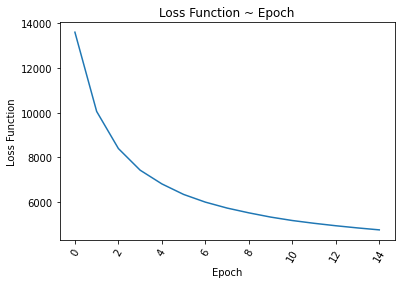

In [ ]:
plot(loss_list)